In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report 
import joblib as jl 
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kousimon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
ps = PorterStemmer()
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]','',text)
    text = text.split()
    text = [ps.stem(word) for word in text if word not in stopwords.words('english')]
    return " ".join(text)

In [4]:
df = pd.read_csv('spam.csv')
df.head()
df.columns = ['label', 'message']

In [5]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df['cleaned_text'] = df['message'].apply(clean_text)

In [6]:
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(df['cleaned_text'])
y=df['label']

In [7]:
df.isna().sum()

label           0
message         0
cleaned_text    0
dtype: int64

<Axes: ylabel='Count'>

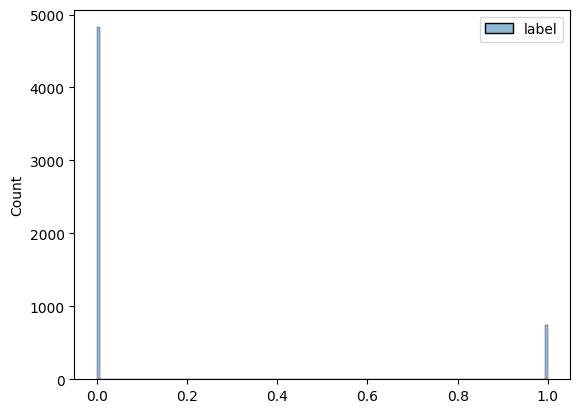

In [8]:
sns.histplot(df)

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [11]:
v=CountVectorizer(max_features=5000)

In [13]:
model = SVC(kernel='linear',random_state=42)

In [16]:
model.fit(x_train,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [17]:
y_pred = model.predict(x_test)

In [18]:
model.score(x_test,y_test)

0.9174887892376682

In [19]:
acc = accuracy_score(y_test,y_pred)
acc

0.9174887892376682

In [20]:
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)

In [21]:
cr

'              precision    recall  f1-score   support\n\n           0       0.91      1.00      0.96       977\n           1       1.00      0.33      0.50       138\n\n    accuracy                           0.92      1115\n   macro avg       0.96      0.67      0.73      1115\nweighted avg       0.92      0.92      0.90      1115\n'

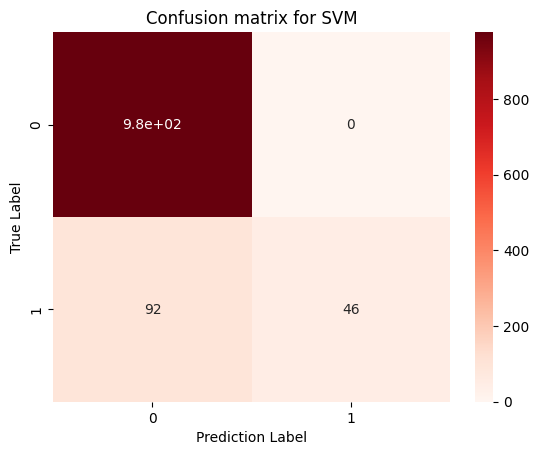

In [22]:
sns.heatmap(cm,annot=True,cmap='Reds')
plt.title('Confusion matrix for SVM')
plt.xlabel('Prediction Label')
plt.ylabel('True Label')
plt.show()

In [23]:
jl.dump(model,'Spam_Detection.pkl')

['Spam_Detection.pkl']

In [24]:
def predict_spam(msg):
    msg_cle=clean_text(msg)
    msg_vec = tfidf.transform([msg_cle])
    pred = model.predict(msg_vec)
    return "Spam" if pred[0] == 1 else "Ham"

Msg = input('Enter the message :')
predict_spam(Msg)

'Ham'